# Credit Card Data Analysis

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
 
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 


# OBJECTIVES

The Happy Customer Bank wants to cross sell its credit cards to its existing customers. 
Now, the bank is looking for your help in identifying the patterns and analyse the dataset.

# METHODOLOGY


### The following Steps have been performed:


### 1) Data Understanding

1a) Loading the dataset

1b) Understanding the data

1c) Typecasting



### 2) Data Cleaning

2a) Handling missing Values


### 3) Exploratory Data Analysis

3a) Univariate Analysis

3b) Bivariate Analysis

3c) Multivariate Analysis

### 4) INFERENCES



# 1) Data Understanding

In [174]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

### 1b) Loading the data

In [175]:
# Read the data
data = pd.read_csv('C:/Users/dell/Desktop/EDA Project/Data.csv')
df = pd.read_csv('C:/Users/dell/Desktop/EDA Project/Data.csv')

### 1b) Understanding the data

In [176]:
#first 10 instances using "head()" function
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [177]:
#last 10 instances using "tail()" function
data.tail(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245715,EJMPTVQZ,Female,26,RG270,Other,X1,19,No,903608,Yes,0
245716,JVSEPN7L,Male,41,RG282,Self_Employed,X4,14,No,368949,Yes,0
245717,LALZCPEV,Male,42,RG251,Self_Employed,X4,13,No,217266,Yes,0
245718,UMKANGED,Male,40,RG284,Self_Employed,X2,13,No,864937,Yes,0
245719,DQ48DATH,Female,38,RG280,Salaried,X2,13,Yes,354665,No,0
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [178]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(245725, 11)

In [179]:
print("Credit Card dataset  has {0} columns and {1} rows".format(data.shape[0],data.shape[1]));

Credit Card dataset  has 245725 columns and 11 rows


In [180]:
#Printing all the columns present in data
data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [181]:
# A closer look at the data types present in the data
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

### 1c) Typecasting

In [182]:
print('This data is composed of: \n', '\033[1m -', (data.dtypes == 'int64').sum(), '\033[0m', 
      'Integer variables \n', '\033[1m -', (data.dtypes == 'object').sum(), '\033[0m', 'Object vaiables')

This data is composed of: 
  - 4  Integer variables 
  - 7  Object vaiables


In [183]:
# Finding out the integers variables
data.dtypes[data.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [184]:
# Finding out the object variables
data.dtypes[data.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [185]:
#Typecasting the object variables to categoriy
data['ID'] = data['ID'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Region_Code'] = data['Region_Code'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')
data['Channel_Code'] = data['Channel_Code'].astype('category')
data['Credit_Product'] = data['Credit_Product'].astype('category')
data['Is_Active'] = data['Is_Active'].astype('category')
data['Is_Lead'] = data['Is_Lead'].astype('category')

In [186]:
data.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
dtype: object

In [187]:
categorical_var = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
numerical_var = ['Age', 'Vintage', 'Avg_Account_Balance']
print(categorical_var)
print(numerical_var)

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead']
['Age', 'Vintage', 'Avg_Account_Balance']


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  category
 1   Gender               245725 non-null  category
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  category
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       216400 non-null  category
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  category
 10  Is_Lead              245725 non-null  category
dtypes: category(8), int64(3)
memory usage: 18.1 MB


#### Except for the Credit_Product feature, all other features and target variables do not have null values.

In [189]:
#check basic stats of the numerical features
data.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


### 2) Data Cleaning

### 2a) Handling missing Values

In [190]:
(data.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

**Credit_product contains 29325 null value**

In [191]:
# Percentage of null values in train dataset
data.isnull().sum()/len(data)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

### The Credit Card dataset has almost 12% missing values in Credit_Product column

In [192]:
data.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [193]:
df = df.fillna("No")

**Filling credit_products value with No beacuse 70% data in Credit_products is No**

In [194]:
(df.isnull().sum())

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

**Now, there are no missing values in data**

# 3) Exploratory Data Analysis

### 3a) Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

### Univariate Analysis (numerical)

**Looking at the numerical datatypes**

In [195]:
numerical = data.select_dtypes(include=['int64'])
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

**Max and Min Range of Numerical Columns**

In [196]:
for i in numerical.columns:
    print(f'range of {i}:[{data[i].min()}, {data[i].max()}]')

range of Age:[23, 85]
range of Vintage:[7, 135]
range of Avg_Account_Balance:[20790, 10352009]


**Density Plots**

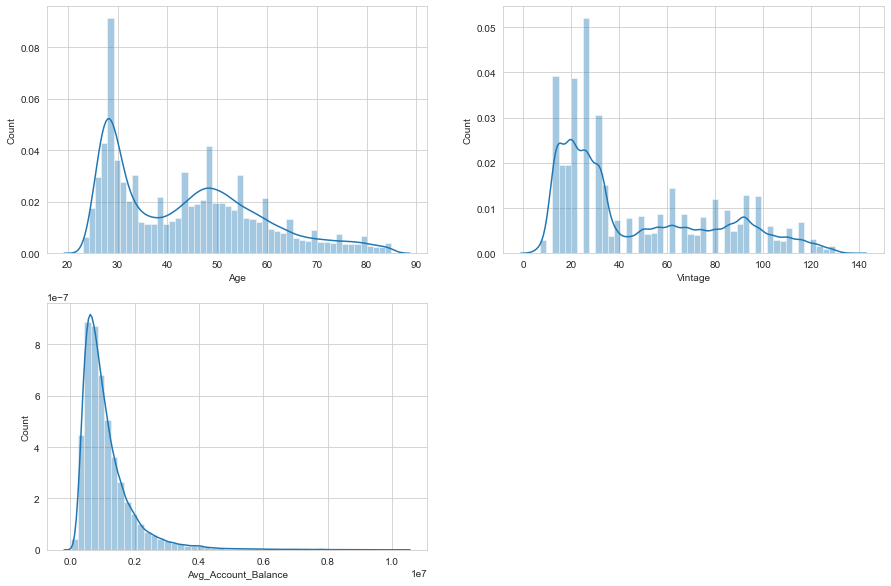

In [197]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
for k,v in enumerate(numerical_var):
    plt.subplot(2,2,k+1)
    plt.ylabel("Count")
    sns.distplot(data[v])
plt.show()

**The Shapiro test is basically a test for normality which rejects the hypothesis of normality
when the p-value is less than or equal to 0.05. 
Failing the normality test allows you to state with 95% confidence the data does not fit the normal distribution. 
Passing the normality test only allows you to state no significant departure from normality was found.**

In [198]:
#test for normality 
from scipy.stats import shapiro
stats,p = shapiro(data['Avg_Account_Balance'])
print('p-value for the Shapiro wilk test %.3f'% (p))
if p>0.05:
    
    print('Data is probably Gaussian')
else:
    print('Data is probably not Gaussian')

p-value for the Shapiro wilk test 0.000
Data is probably not Gaussian


**Box Plot**

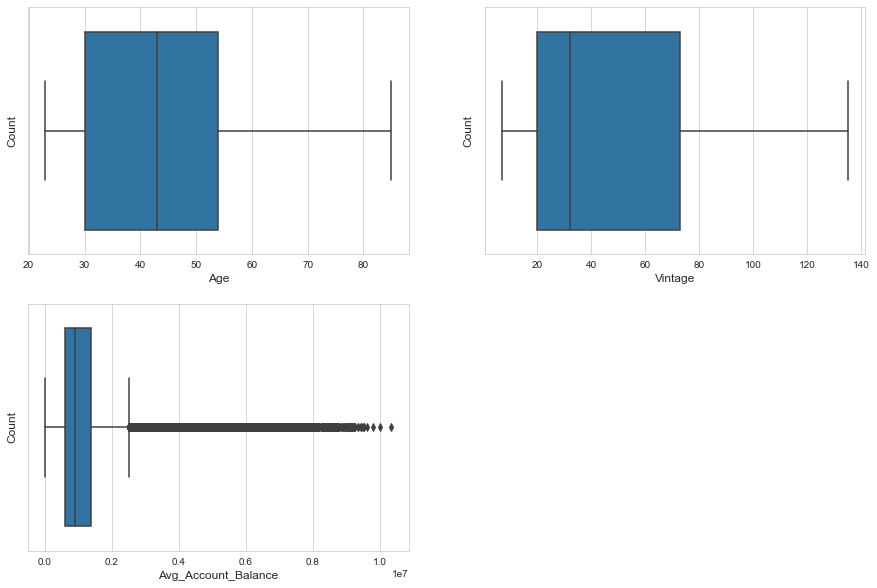

In [199]:
# Boxplot 
plt.figure(figsize=(15,10))

for i,col in enumerate(numerical_var):
    plt.subplot(2,2,i+1);
    sns.boxplot(data[col])
    plt.xlabel(col,fontdict={'fontsize':12})
    plt.ylabel("Count",fontdict={'fontsize':12})

**From both box plot and distplot, we can say/observe that Avg_Account_Balance is right skewed.
It is also known as Positive Skewness.For such type of distribution most of the data will be concentrated on the 
left side and there will be very less values which will occur on the right side.And because of the the outliers on the right side the mean ends up being much more than the median.**

In [200]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

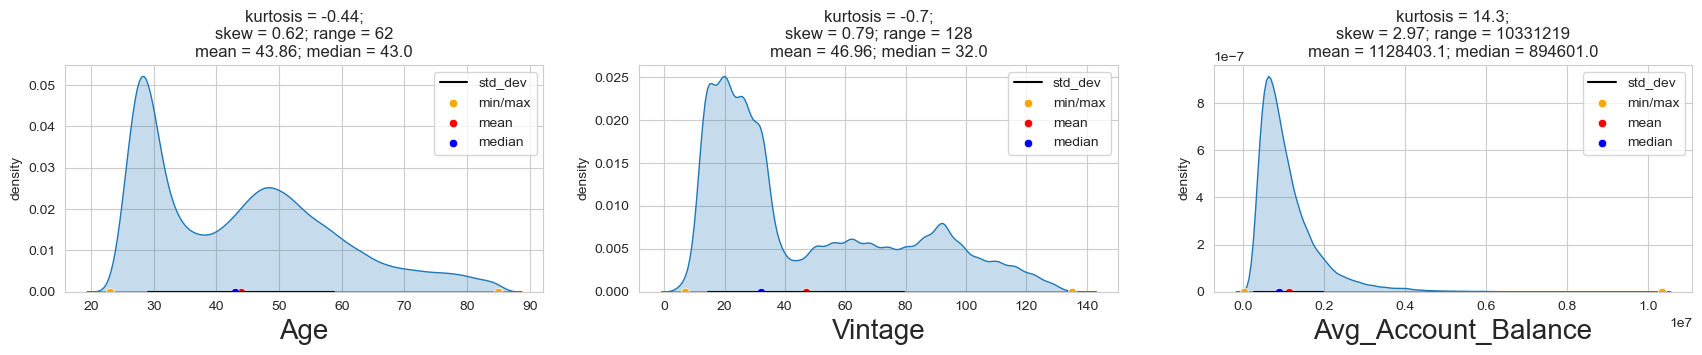

In [201]:
UVA_KDE(data,numerical_var)

**Kernel density Estimate Plots are used to visualize the distribution of the data.The purpose is to draw a more continuous distribution.
-The skewness for all the 3 variable is greater than 0.5 which means they are positively skewed.
-Kurtosis bsically gives an idea of the tails of a distribution.
-Negative value of kurtosis for Age and Vintage means low presence of extreme values,while the positive value of kurtosis as in the case of Avg_Account_Balance shows the presence of lot of extreme values.**

In [202]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))


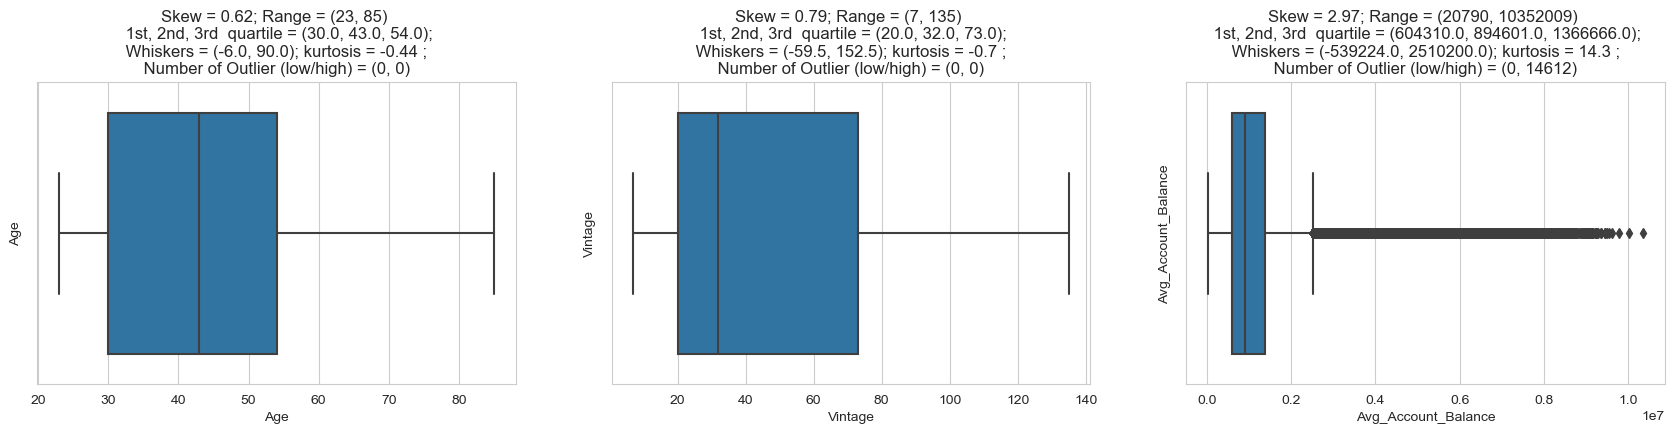

In [203]:
UVA_boxplot(data,numerical_var)

### Univariate Analysis (Categorical)
Here we are just calculating the number of each category in a particular variable with the help of bar plots.

AxesSubplot(0.125,0.125;0.775x0.755)


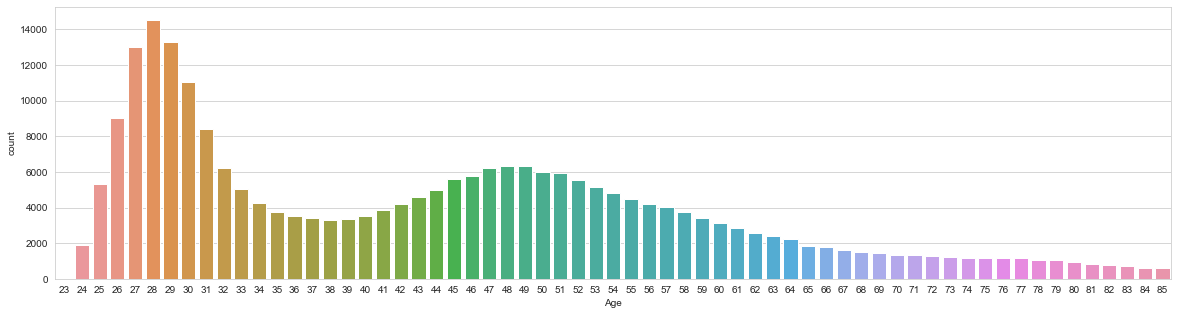

In [204]:
# countplot for age group
plt.figure(figsize=(20,5))
print(sns.countplot(data['Age']))

**We can see that most of the bank customers are of the age 28 years.**

AxesSubplot(0.125,0.125;0.775x0.755)


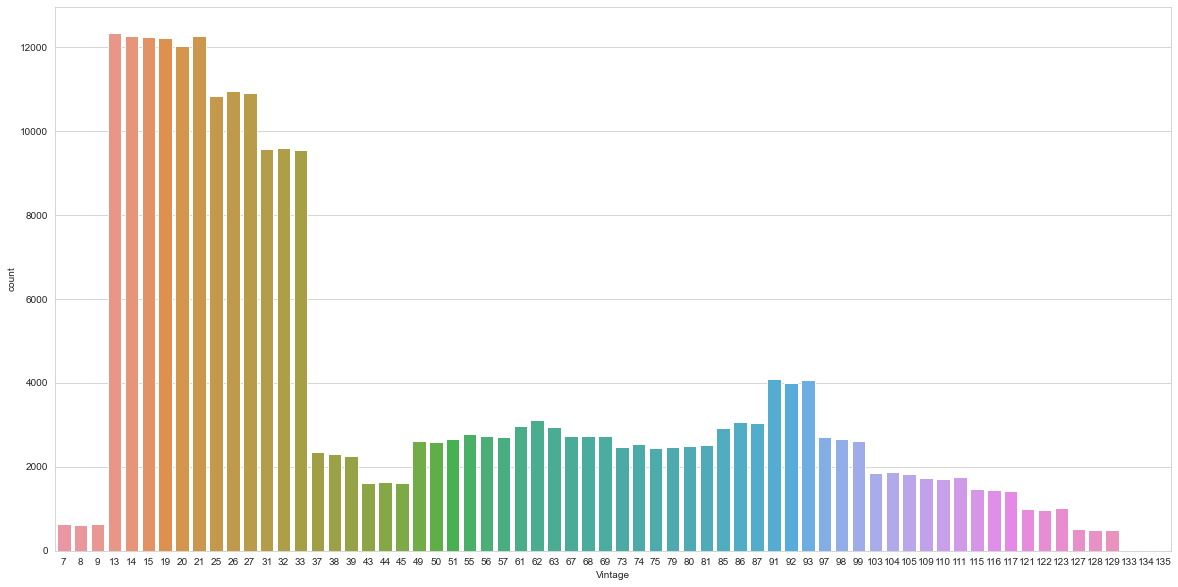

In [205]:
# countplot for vintage
plt.figure(figsize=(20,10))
print(sns.countplot(data['Vintage']))

**From this plot we can see that most of the bank customers have been associated with the bank between 13- 33 months.**

In [206]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

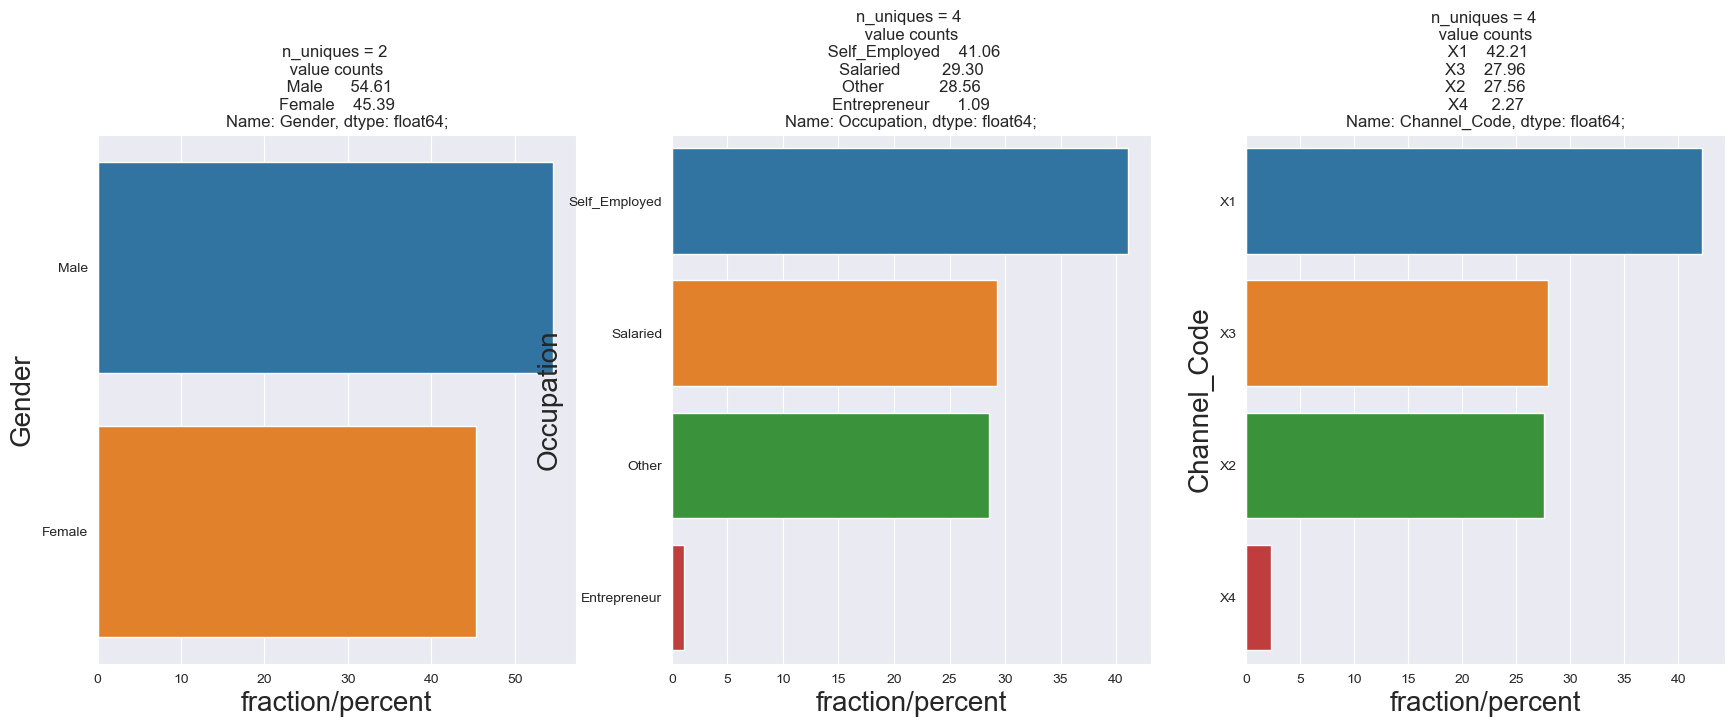

In [209]:
UVA_category(data, ['Gender', 'Occupation','Channel_Code'] )

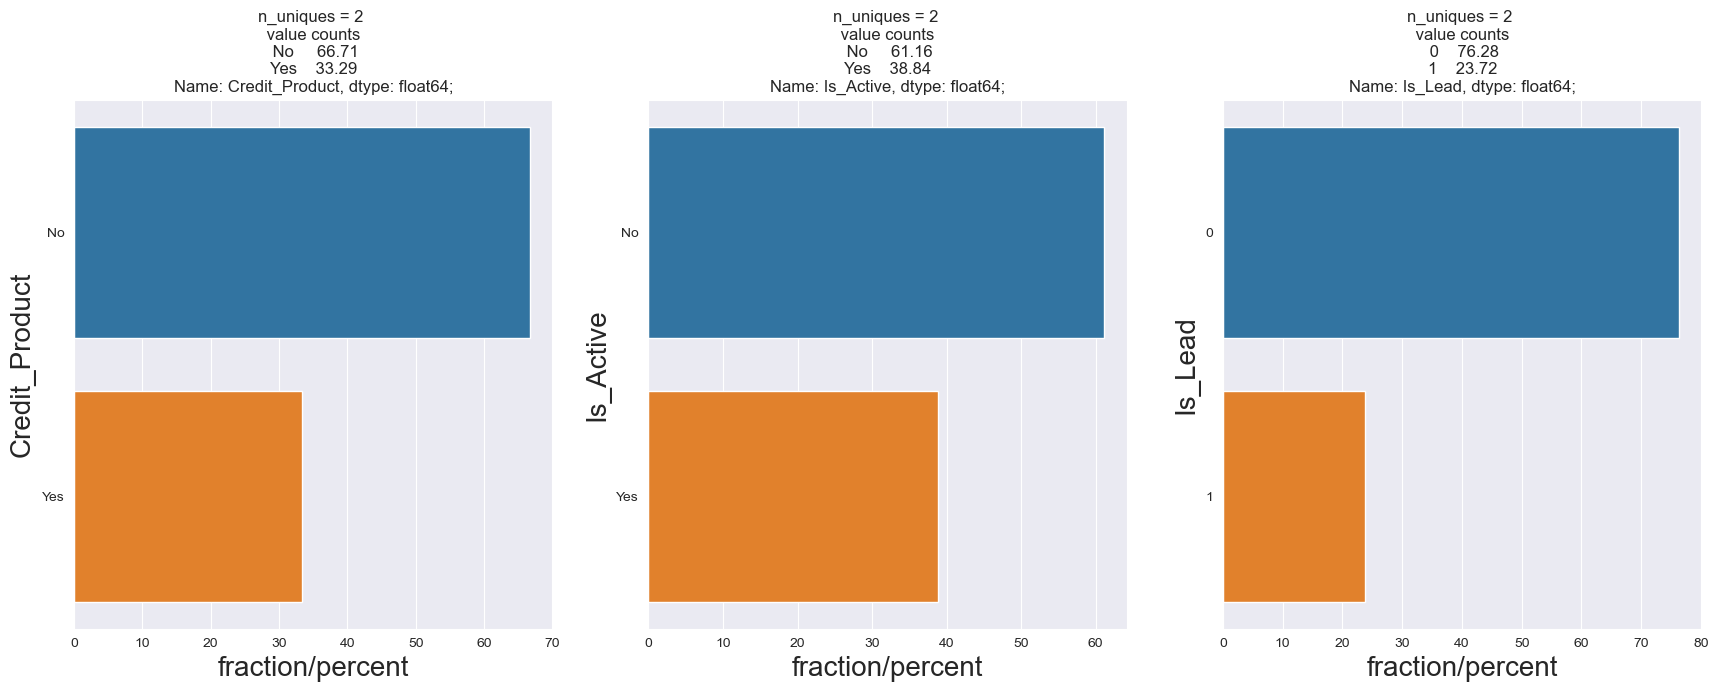

In [210]:
UVA_category(data, ['Credit_Product', 'Is_Active', 'Is_Lead'])

In [211]:
data['Is_Lead'].value_counts(normalize=True)*100

0    76.279174
1    23.720826
Name: Is_Lead, dtype: float64

**Rate of Conversion is almost 24%**

# Bivariate Analysis
**It involves the analysis of two variables**

### Bivariate Analysis (numerical vs numerical)

In [69]:
numerical = data.select_dtypes(exclude = ['category'])[:]
numerical.dtypes

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
dtype: object

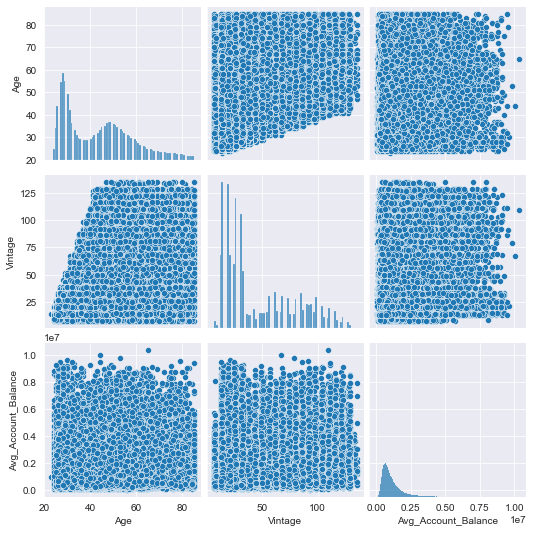

In [70]:
# Pair plot for Numeric Variables

sns.pairplot(data[numerical_var])
plt.show()

**FRom the above vintage vs Age scatter plot we can observe that all the data points are below a line. 
There are no data points above that line. May be there is Max vintage within an age group (23-40).**

### Bivariate Analysis (categorical vs numerical)

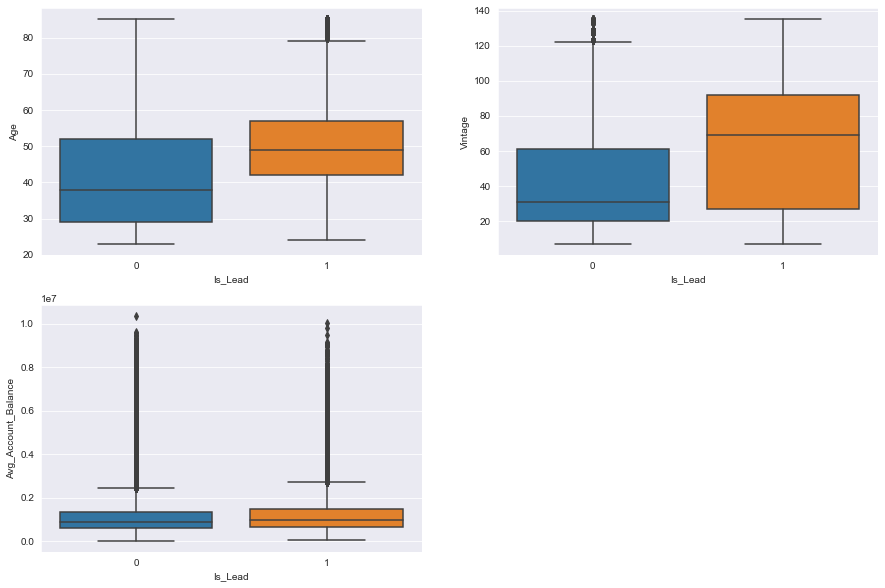

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'Age', x = 'Is_Lead', data = data)

plt.subplot(2,2,2)
sns.boxplot(y = 'Vintage', x = 'Is_Lead', data = data)

plt.subplot(2,2,3)
sns.boxplot(y = 'Avg_Account_Balance', x = 'Is_Lead', data = data)
plt.show()

**Median and spread of Avg_Account_Balance in lead and not lead is almost same.
Median Age of customers who are leads is more than that of not lead customers.
Median Vintage of customers who are leads is more than that of not lead customers.
The spread is also more in case of customers who are leads.**

## Age Analysis

In [212]:
max(df.Age.values),min(df.Age.values)

(85, 23)

#### <40 class 1
#### 40 to 70 class 2
#### >70 class 3 

In [213]:
age_class=[]
for age in df.Age.values:
    if age<=40:
        age_class.append(1)
    elif age>40 and age<=70:
        age_class.append(2)
    else:
        age_class.append(3)

In [214]:
df['Age_class'] = age_class

In [215]:
df.Age_class.value_counts()

2    117889
1    112869
3     14967
Name: Age_class, dtype: int64

In [216]:
age_less_than_40 = df[df.Age_class==1]
age_bet_40_to_70 = df[df.Age_class==2]
age_greater_than_70 = df[df.Age_class==3]

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

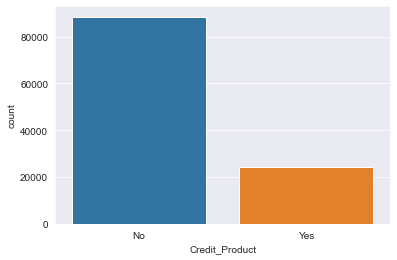

In [111]:
sns.countplot(age_less_than_40.Credit_Product)

**From this we can say that the number of bank customers who do not have any active credit product is more for people who are less than 40 years.**

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

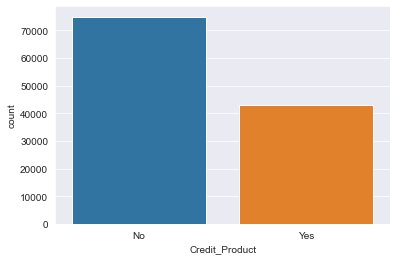

In [112]:
sns.countplot(age_bet_40_to_70.Credit_Product)

**that the number of bank customers who do not have any active credit product is more for people who are in the age group 40-70 years.**

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

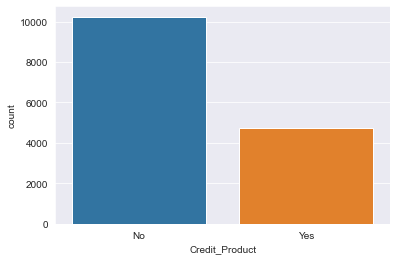

In [113]:
sns.countplot(age_greater_than_70.Credit_Product)

**But comparitively after looking at the above three graphs we can say that the People between age 40 to 70 most use credit_products**  

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

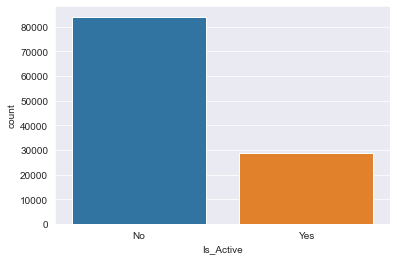

In [114]:
sns.countplot(age_less_than_40.Is_Active)

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

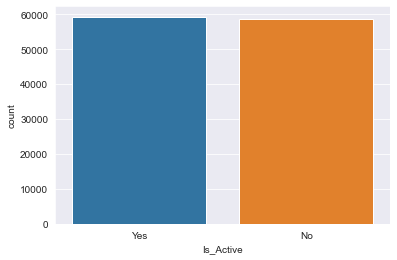

In [115]:
sns.countplot(age_bet_40_to_70.Is_Active)

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

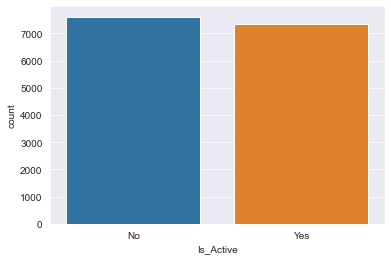

In [116]:
sns.countplot(age_greater_than_70.Is_Active)

**Is_active status is 50% for both 40 to 70  age range and greater than 70 age customer**  

### Bivariate Analysis (categorical vs categorical)

### Gender analysis

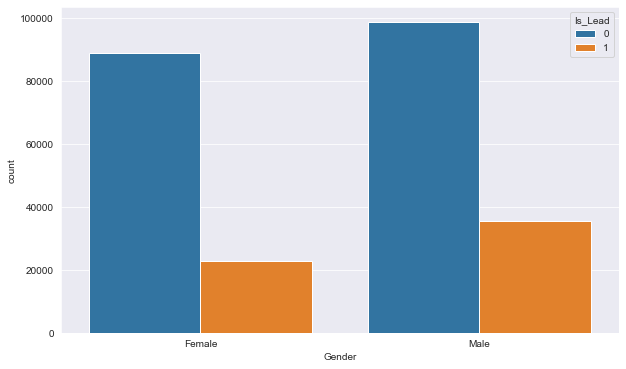

In [217]:
# Gender vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Gender', hue='Is_Lead', data=data)
plt.show()

In [218]:
data[data['Gender']=='Male']['Is_Lead'].value_counts(normalize= True)*100

0    73.484504
1    26.515496
Name: Is_Lead, dtype: float64

In [219]:
data[data['Gender']=='Female']['Is_Lead'].value_counts(normalize= True)*100

0    79.641884
1    20.358116
Name: Is_Lead, dtype: float64

**Conversion rate of male (26%) is higher than female (20%).**

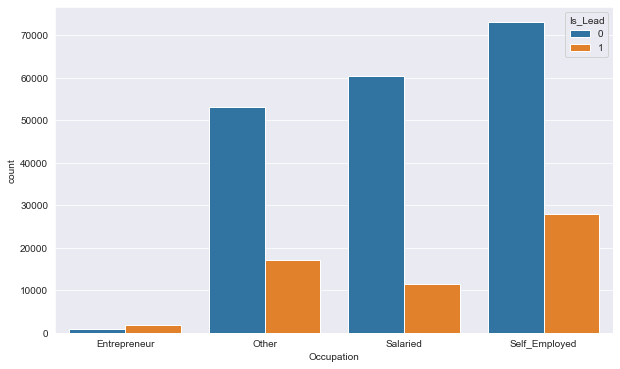

In [86]:
# Occupation vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Occupation', hue='Is_Lead', data=data)
plt.show()

In [87]:
data[data['Occupation']=='Entrepreneur']['Is_Lead'].value_counts(normalize= True)*100

1    66.066742
0    33.933258
Name: Is_Lead, dtype: float64

In [88]:
data[data['Occupation']=='Other']['Is_Lead'].value_counts(normalize= True)*100

0    75.504824
1    24.495176
Name: Is_Lead, dtype: float64

In [89]:
data[data['Occupation']=='Salaried']['Is_Lead'].value_counts(normalize= True)*100

0    84.033112
1    15.966888
Name: Is_Lead, dtype: float64

In [90]:
data[data['Occupation']=='Self_Employed']['Is_Lead'].value_counts(normalize= True)*100

0    72.403505
1    27.596495
Name: Is_Lead, dtype: float64

**We can observe that conversion rate among Entrepreneurs is high (66%). Company should focus on getting more Entrepreneurs Leads.
Conversion rate among Salaried customers is low (15%).**

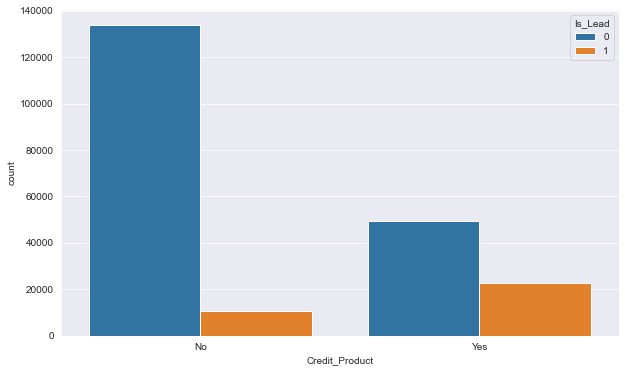

In [223]:
# Credit_Product vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Credit_Product', hue='Is_Lead', data=data)
plt.show()


In [224]:
data[data['Credit_Product']=='No']['Is_Lead'].value_counts(normalize= True)*100

0    92.64116
1     7.35884
Name: Is_Lead, dtype: float64

In [225]:
data[data['Credit_Product']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

0    68.504921
1    31.495079
Name: Is_Lead, dtype: float64

**Conversion rate among customers with Credit_Product is more (31%) as compared to customers without Credit_Product (7%).**

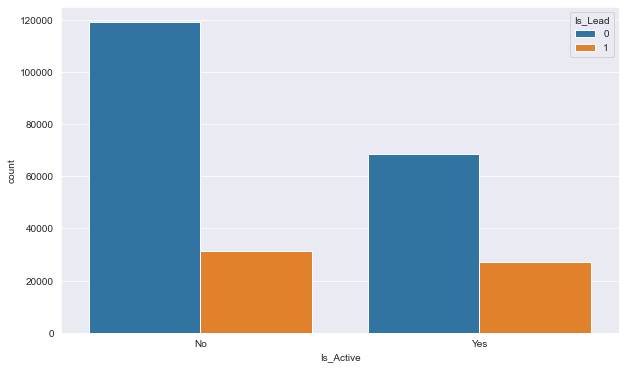

In [226]:
# Is_Active vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Is_Active', hue='Is_Lead', data=data)
plt.show()

In [227]:
data[data['Is_Active']=='No']['Is_Lead'].value_counts(normalize= True)*100

0    79.184909
1    20.815091
Name: Is_Lead, dtype: float64

In [228]:
data[data['Is_Active']=='Yes']['Is_Lead'].value_counts(normalize= True)*100

0    71.703254
1    28.296746
Name: Is_Lead, dtype: float64

**Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who were not active (20%).**

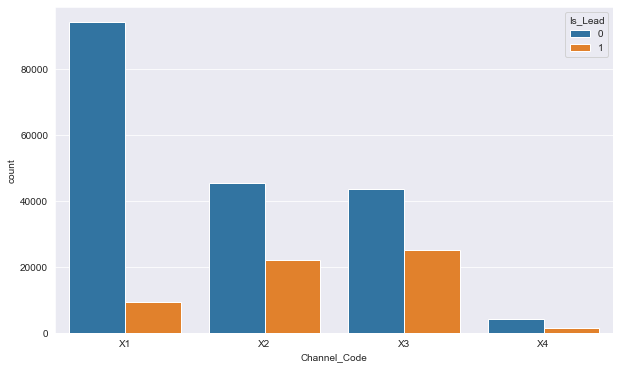

In [229]:
# Channel_Code vs Is_Lead
plt.figure(figsize=(10,6))
sns.countplot(x= 'Channel_Code', hue='Is_Lead', data=data)
plt.show()

In [230]:
data[data['Channel_Code']=='X1']['Is_Lead'].value_counts(normalize= True)*100

0    90.857903
1     9.142097
Name: Is_Lead, dtype: float64

In [231]:
data[data['Channel_Code']=='X2']['Is_Lead'].value_counts(normalize= True)*100

0    67.210525
1    32.789475
Name: Is_Lead, dtype: float64

In [232]:
data[data['Channel_Code']=='X3']['Is_Lead'].value_counts(normalize= True)*100

0    63.297532
1    36.702468
Name: Is_Lead, dtype: float64

In [233]:
data[data['Channel_Code']=='X4']['Is_Lead'].value_counts(normalize= True)*100

0    75.219968
1    24.780032
Name: Is_Lead, dtype: float64

**We can observe that conversion rate in Channel_Code X1 is very low (9%) and good in X3 (36%). Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.**

In [234]:
#check the correlation
data[['Age','Vintage','Avg_Account_Balance']].corr()

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


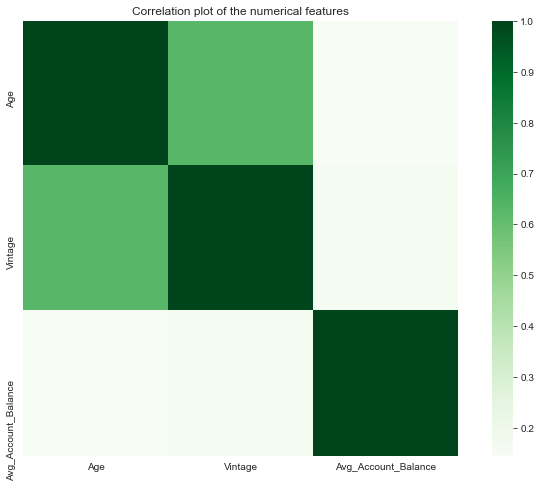

In [235]:
#visualise the correlation 
plt.figure(figsize=(12,8))
sns.heatmap(data[['Age','Vintage','Avg_Account_Balance']].corr(),square=True,cmap='Greens')
plt.title('Correlation plot of the numerical features')
plt.show()

**There is positive correlation between Age and Vintage (63%).
Age and Vintage have high correlation while it cannot be said for the other features.**

## Multivariate analysis

<AxesSubplot:xlabel='Is_Active', ylabel='Age'>

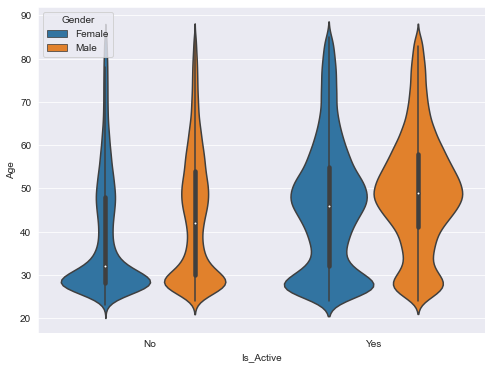

In [236]:
plt.figure(figsize=(8,6))
sns.violinplot(df.Is_Active,df.Age, hue= df.Gender)

**Between age 40 to 60 male are more active as compared to female**

#### CATEGORICAL - CATEGORICAL

#### LIST OF HYPOTHESIS TO CHECK

**Chi-square results**

A chi-square statistic is one way to show a relationship between two categorical variables
A chi square test will give you a p-value. The p-value will tell you if your test results are significant or not.

* Does `Gender` have a significant impact on the `Is_Lead`?
* Does `Occupation` have a significant impact on the `Is_Lead`?
* Does `Channel_code` have a significant impact on the `Is_Lead`?
* Does `Credit_Product` have a significant impact on the `Is_Lead`?
* Does `Is_Active` have a significant impact on the `Is_Lead`?

In [237]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

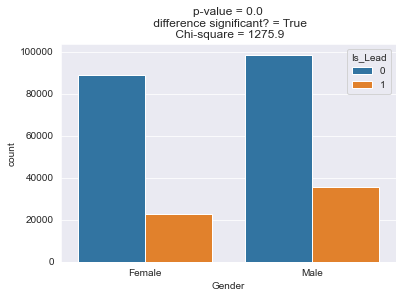

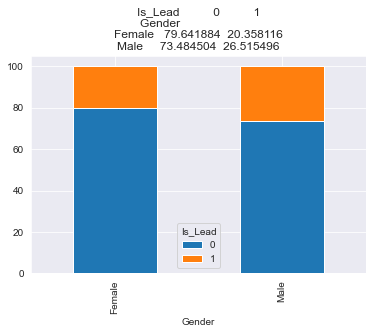

In [238]:
BVA_categorical_plot(df, 'Is_Lead', 'Gender')

Here we can see that there is a significant difference between Gender and Is_Lead as we can see that difference significant = True.

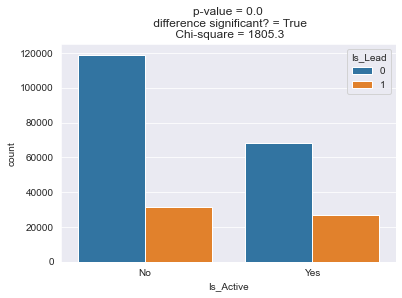

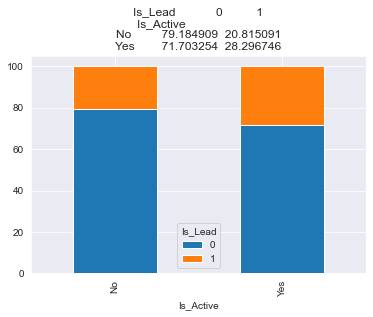

In [239]:
BVA_categorical_plot(df, 'Is_Lead', 'Is_Active')

Here we can see that there is a significant difference between Is_Active and Is_Lead as we can see that difference significant = True.

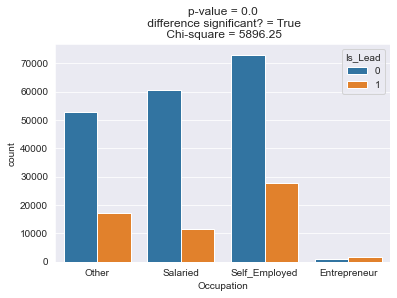

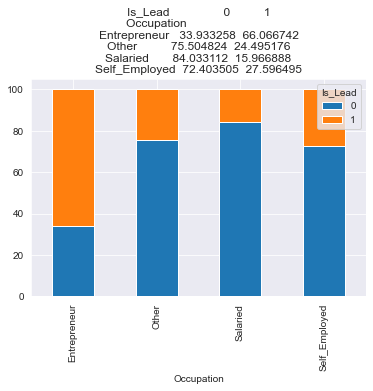

In [125]:
BVA_categorical_plot(df, 'Is_Lead', 'Occupation')

Here we can see that there is a significant difference between Occupation and Is_Lead as we can see that difference significant = True.

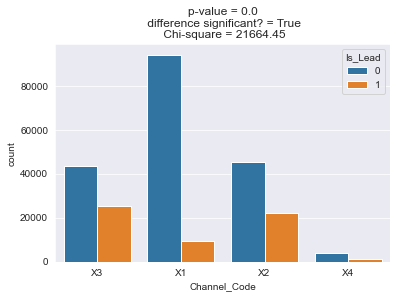

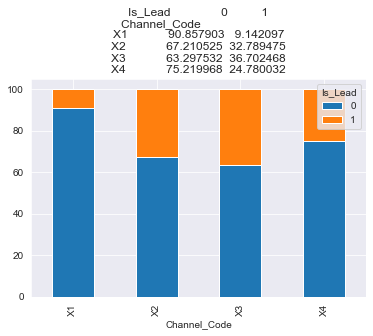

In [126]:
BVA_categorical_plot(df, 'Is_Lead', 'Channel_Code')

Here we can see that there is a significant difference between Channel_code and Is_Lead as we can see that difference significant = True.

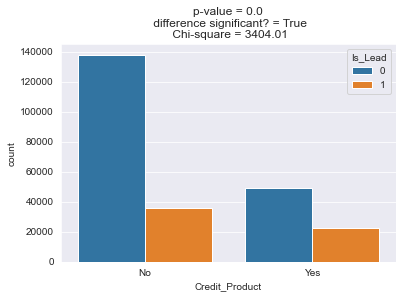

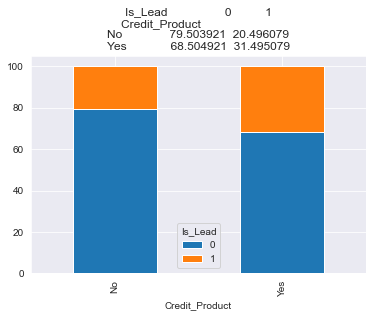

In [128]:
BVA_categorical_plot(df, 'Is_Lead', 'Credit_Product')

Here we can see that there is a significant difference between Credit_Product and Is_Lead as we can see that difference significant = True.

**Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.**

In [240]:
#label encoding
data=pd.get_dummies(data, columns=['Gender','Occupation', 'Channel_Code','Is_Active'],drop_first=True)

In [241]:
data

,ID,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,NNVBBKZB,73,RG268,43,No,1045696,0,0,1,0,0,0,1,0,0
1,IDD62UNG,30,RG277,32,No,581988,0,0,0,1,0,0,0,0,0
2,HD3DSEMC,56,RG268,26,No,1484315,0,0,0,0,1,0,1,0,1
3,BF3NC7KV,34,RG270,19,No,470454,0,1,0,1,0,0,0,0,0
4,TEASRWXV,30,RG282,33,No,886787,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,51,RG284,109,NaN,1925586,0,1,0,0,1,0,1,0,0
245721,HFNB7JY8,27,RG268,15,No,862952,0,1,0,1,0,0,0,0,1
245722,GEHAUCWT,26,RG281,13,No,670659,0,0,0,1,0,0,0,0,0
245723,GE7V8SAH,28,RG273,31,No,407504,0,0,0,1,0,0,0,0,0


In [242]:
# droping unwanted columns
data.drop(['ID','Region_Code'], axis=1,inplace=True)

In [243]:
# filling nan values
data['Credit_Product']=np.where(data['Credit_Product'].isnull(),1,0)
data['Credit_Product']

0         0
1         0
2         0
3         0
4         0
         ..
245720    1
245721    0
245722    0
245723    0
245724    0
Name: Credit_Product, Length: 245725, dtype: int32

In [146]:
# preparing new data 
new_data=data[['Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance','Gender_Male', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4','Is_Lead','Is_Active_Yes']]

In [147]:
# new data top rows
new_data.head()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Lead,Is_Active_Yes
0,73,43,0,1045696,0,1,0,0,0,1,0,0,0
1,30,32,0,581988,0,0,1,0,0,0,0,0,0
2,56,26,0,1484315,0,0,0,1,0,1,0,0,1
3,34,19,0,470454,1,0,1,0,0,0,0,0,0
4,30,33,0,886787,0,0,1,0,0,0,0,0,0


In [148]:
#new_data shape
new_data.shape

(245725, 13)

In [149]:
# independent variables
x = new_data.drop(['Is_Lead'], axis=True)
x

,Age,Vintage,Credit_Product,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,73,43,0,1045696,0,1,0,0,0,1,0,0
1,30,32,0,581988,0,0,1,0,0,0,0,0
2,56,26,0,1484315,0,0,0,1,0,1,0,1
3,34,19,0,470454,1,0,1,0,0,0,0,0
4,30,33,0,886787,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1,1925586,1,0,0,1,0,1,0,0
245721,27,15,0,862952,1,0,1,0,0,0,0,1
245722,26,13,0,670659,0,0,1,0,0,0,0,0
245723,28,31,0,407504,0,0,1,0,0,0,0,0


In [150]:
# dependend variables
y = new_data['Is_Lead']
y

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: category
Categories (2, int64): [0, 1]

In [151]:
# applying train test split 
from sklearn.model_selection import train_test_split

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [153]:
xtrain.shape

(172007, 12)

In [154]:
xtest.shape

(73718, 12)

In [155]:
ytrain.shape

(172007,)

In [156]:
ytest.shape

(73718,)

In [157]:
# model building with randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion =  'gini', max_depth = 20, n_estimators =100)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=20)

In [158]:
# prediction values
y_pred = rfc.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
# for finding accuracy_score
from sklearn.metrics import accuracy_score

In [160]:
# accuracy score
score =accuracy_score(ytest,y_pred)
score

0.8523834070376299

**INFERENCES FROM THE DATA**

**Conversion rate of male (26%) is higher than female (20%).**

**We can observe that conversion rate among Entrepreneurs is high (66%). Company should focus on getting more Entrepreneurs Leads.**

**Conversion rate among Salaried customers is low (15%).Company should focus on improving leads with Salaried customers.**

**Conversion rate among customers with Credit_Product is more (31%) as compared to customers without Credit_Product (20%).**

**Conversion rate among customers who were active in last 3 Months is more (28%) as compared to customers who
were not active (20%).**

**We can observe that conversion rate in Channel_Code X1 is very low (9%) and good in Channel_Code X3 (36%).**

**Company should get more customers from Channel_Code X3 and focus on improving leads from Channel_Code X1.**